## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2025, Prof. J.C. Kao, TAs: B. Qu, K. Pang, S. Dong, S. Rajesh, T. Monsoor, X. Yan

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x + 2x^2 -3x^3 + \epsilon$

Text(0, 0.5, '$y$')

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyw

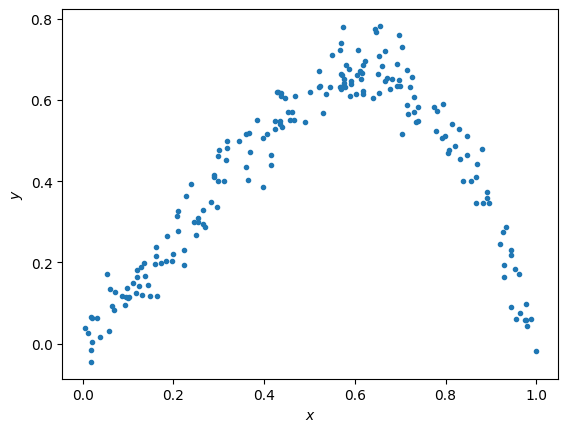

In [2]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x + 2*x**2 - 3*x**3 + np.random.normal(loc=0, scale=0.05, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?


(2) What is the distribution of the additive noise $\epsilon$?



### ANSWERS:

(1) Values of x are sampled from a uniform distribution between 0 and 1.

(2) The additive noise vlaues are derived from a normal distribution with mean 0 and standard deviation 0.05.

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [3]:
#xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# Projecting y onto the column space of xhat
theta = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat).dot(y)
print(theta)


[0.31325736 0.26474646]


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyw

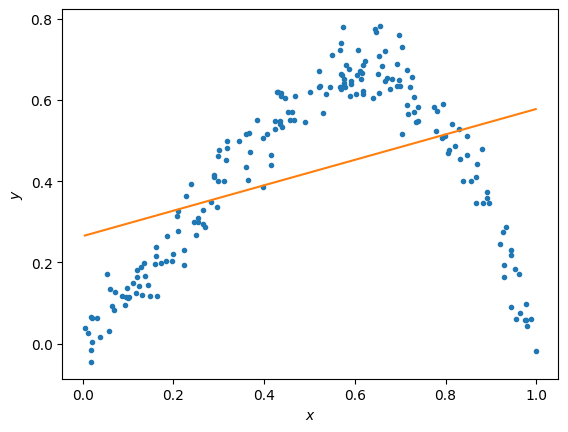

In [4]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear model underfits the data. Looking at the generated data and the true model (y = x + 2x² - 3x³ + ε), we can see the relationship is cubic, but we're trying to fit it with just a straight line. The linear model is too simple to capture the underlying nonlinear relationship.

(2) We should use a higher-order polynomial model that can capture the nonlinear relationship. Since the true relationship is cubic, at minimum a third-order polynomial model would be appropriate. This would allow the model to capture both the linear and nonlinear components of the relationship.

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [5]:

N = 5
xhats = []
thetas = []

# For each polynomial order 1 to 5
for i in range(N):
    # Create feature matrix for current polynomial order
    if i == 0:
        # First order: [x, 1]
        xhat = np.vstack((x, np.ones_like(x)))
    else:
        # Higher orders: [x^n, x^(n-1), ..., x, 1]
        xhat = np.vstack((x**(i+1), xhat))
    
    xhats.append(xhat)
    
    # Model Coefficients
    theta = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat).dot(y)
    thetas.append(theta)

pass

print(thetas)


[array([0.31325736, 0.26474646]), array([-2.54077983,  2.81808862, -0.14765329]), array([-3.19269866,  2.29870971,  0.8529672 ,  0.01631781]), array([ 0.23466729, -3.65889518,  2.59581785,  0.78750808,  0.01958868]), array([ 0.87387653, -1.94094667, -1.73245937,  1.87616209,  0.88956527,
        0.01619333])]


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyw

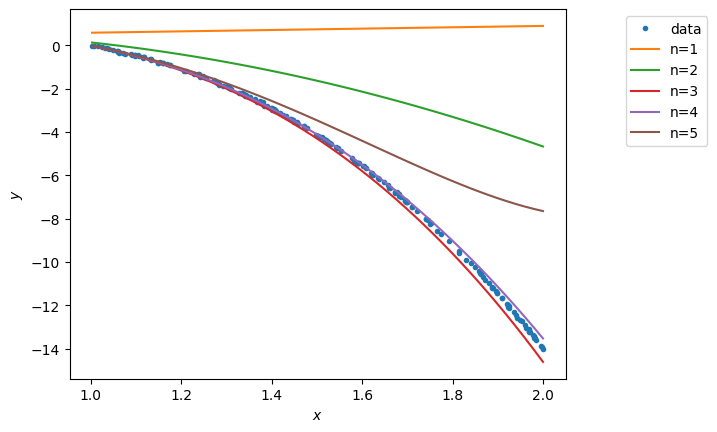

In [12]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [13]:
training_errors = []


for i in np.arange(N):

    y_pred = thetas[i].dot(xhats[i])
    
    mse = np.mean((y - y_pred) ** 2)
    
    training_errors.append(mse)

pass

print ('Training errors are: \n', training_errors)

Training errors are: 
 [54.246317716012236, 18.911159217529747, 0.08693862570546057, 0.03042966869910436, 5.954356339341897]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The fifth order polynomial has the best traning error.

(2) Using a higher-order polynomial helps the model capture more relationships compred to lower order ones. Therefore, we get a low training error for the fifth order polynomial.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyw

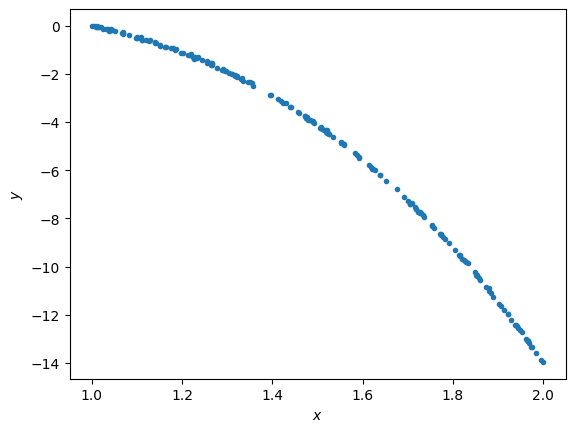

In [14]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x + 2*x**2 - 3*x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [15]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyw

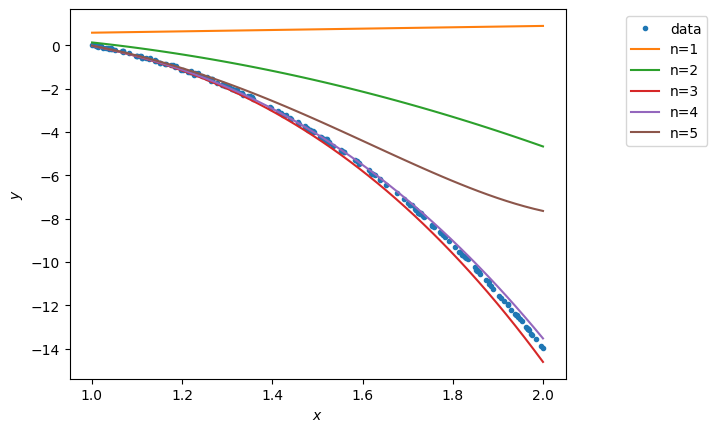

In [16]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [17]:
testing_errors = []



for i in np.arange(N):

    y_pred = thetas[i].dot(xhats[i])
    
    mse = np.mean((y - y_pred) ** 2)
    
    testing_errors.append(mse)

pass



print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [51.595934377138384, 17.88767990466363, 0.08568137176745275, 0.02624925686033019, 5.438380112067071]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) Lower-order polynomials (e.g., orders 1 or 2) may underfit, leading to high training and testing errors. Higher-order polynomials (e.g., order 5) tend to overfit, capturing noise in the training data, which results in poor testing performance. The fourth order polynomial has the best testing error.

(2) Polynomial models of order 5 may not generalize well because of overfitting, which occurs when the model becomes too flexible and fits the noise in the training data rather than the underlying trend.